## Análisis de Audiencia de un sitio Web (fuente Google Analytics).

El siguiente cuaderno tiene como objetivo estandarizar un reporte apartir de la información de Google Analytics.

Jerarquía de ejecución:

    - Unión de información reportes analytics, edad, sexo.
    
    - Resumenes 
    
    - Gráficas
    
    - ¿Cómo crear funciones para la creación de un reporte?

###### Definiciones de modulos y paquetes a usar.

In [1]:
import pandas as pd #Paquete pandas manipulación de datos

import os #módulo que incluyen muchas funciones para interactuar con el sistema de archivos
import glob #El módulo glob encuentra todos los nombres de ruta que coinciden con un patrón especificado

pd.set_option('display.float_format', lambda x: '%.f' % x) #Opcion para notación científica

###### Trabajar con rutas

In [2]:
os.getcwd() #Ver la ruta de nuesto cuaderno

'C:\\Users\\crf005r\\Documents\\3_GitHub\\Capacitaciones-Python\\1_Python Programming'

In [3]:
#Especificando manualmente la ruta del cuaderno
os.chdir("C:/Users/crf005r/Documents/3_GitHub/Capacitaciones-Python/1_Python Programming")

os.getcwd() #Ver la ruta de nuesto cuaderno

'C:\\Users\\crf005r\\Documents\\3_GitHub\\Capacitaciones-Python\\1_Python Programming'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx',
 'Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx',
 'Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx',
 'Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx',
 'Clase_1.py',
 'Clase_2.ipynb',
 'Clase_3.ipynb',
 'Clase_4.ipynb',
 'Curiosidades',
 'Ej_Clase_1_Palindrome.ipynb',
 'Ej_Clase_2.ipynb',
 'Ej_clase_3.ipynb',
 'mtcars.csv',
 'twiter.csv']

#### Unión de informacion reportes analytics, edad, sexo.

In [327]:
sexo = glob.glob("*sexo.xlsx") #Encontrarn un archivo con un patrón en especifico
edad = glob.glob("*edad.xlsx")

sexo , edad

(['Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx',
  'Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx'],
 ['Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx',
  'Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx'])

In [328]:
#Un archivo de excel 
sexo[0]

'Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx'

In [329]:
#Lectura de un archivo de excel y su hoja
tmp = pd.read_excel(sexo[0], sheet_name = 'Conjunto de datos1')
tmp.tail(2)

,Categoría de afinidad (cobertura),Sexo,Usuarios,Usuarios nuevos,Sesiones,Porcentaje de rebote,Páginas/sesión,Duración media de la sesión,Transacciones,Ingresos,Tasa de conversión de comercio electrónico
232,News & Politics/Avid News Readers/Men's Media ...,female,12,9,27,0,25,516,0,0,0
233,NaN,NaN,10471351,7864353,17184249,0,12,219,96644,218915398,0


In [330]:
tmp.shape

(234, 11)

In [58]:
#Un poco de formato despues de leer los datos de la hoja de excell
archivo = ["sexo", "edad"]

tmp['archivo'] = sexo[0]
tmp = tmp.iloc[:-1]
tmp['categoria'] = archivo[0]
tmp.columns = ['categoria_afinidad', 'subcategoria', 'usuarios', 'usuarios_nuevos', 'sesiones',
               'porcentaje_rebote', 'paginas_sesion','duracion_media_sesion', 'transacciones',
               'ingresos', 'tasa_conversion_electronico', 'archivo','categoria']
tmp.tail(2)

,categoria_afinidad,subcategoria,usuarios,usuarios_nuevos,sesiones,porcentaje_rebote,paginas_sesion,duracion_media_sesion,transacciones,ingresos,tasa_conversion_electronico,archivo,categoria
230,Sports & Fitness/Sports Fans/Rugby Enthusiasts,female,27,21,36,0.083333,14.861111,284.500000,1,3599.0,0.027778,Analytics-officedepot.com-Intereses-20200101-2...,sexo
231,Sports & Fitness/Sports Fans/Australian Footba...,male,20,17,44,0.000000,9.750000,186.159091,1,1099.0,0.022727,Analytics-officedepot.com-Intereses-20200101-2...,sexo
232,News & Politics/Avid News Readers/Men's Media ...,female,12,9,27,0.000000,25.333333,515.666667,0,0.0,0.000000,Analytics-officedepot.com-Intereses-20200101-2...,sexo


In [102]:
analytics_union = []

len(analytics_union)

0

In [103]:
analytics_union.append(tmp) #Agregación del primer archivo a una lista

len(analytics_union)

1

In [104]:
analytics_union = pd.concat(analytics_union) #Concatena todos los archivos en la lista analytics_union = []

analytics_union.archivo.value_counts()

Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx    233
Name: archivo, dtype: int64

In [107]:
analytics_union.head(2)

,categoria_afinidad,subcategoria,usuarios,usuarios_nuevos,sesiones,porcentaje_rebote,paginas_sesion,duracion_media_sesion,transacciones,ingresos,tasa_conversion_electronico,archivo,categoria
0,Food & Dining/Cooking Enthusiasts/30 Minute Chefs,female,218757,168308,354557,0.056132,12.146885,222.034217,1867,4032142.78,0.005266,Analytics-officedepot.com-Intereses-20200101-2...,sexo
1,Shoppers/Value Shoppers,female,196414,145640,324263,0.054770,12.483259,224.122317,2017,4446559.57,0.006220,Analytics-officedepot.com-Intereses-20200101-2...,sexo


#### ¿Como unimos todos los arhivos?

Ayuda a realizar una misma tarea varias veces.

Con un bucle for podemos iterar un proceso.

In [108]:
archivos = ["sexo", "edad"]

for archivo in archivos:
    
  print(archivo)

sexo
edad


In [115]:
for archivo in archivos:
    
    for xls in eval(archivo):
        print(archivo)
        print(xls)

sexo
Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx
sexo
Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx
edad
Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx
edad
Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx


##### Proceso para unir todos los archivos

In [111]:
analytics_union = []

sexo = glob.glob("*sexo.xlsx") #Encontrarn un archivo con un patrón en especifico
edad = glob.glob("*edad.xlsx")

archivos = ["sexo", "edad"]

# Productos por Campaña #
for archivo in archivos:
    
    for xls in eval(archivo):
        tmp = pd.read_excel(xls, 'Conjunto de datos1') #Lectura de un archivo de excel y su hoja
        #Un poco de formato despues de leer los datos de la hoja de excell
        tmp['archivo'] = xls
        tmp = tmp.iloc[:-1]
        tmp['categoria'] = archivo
        tmp.columns = ['categoria_afinidad', 'subcategoria', 'usuarios', 'usuarios_nuevos', 'sesiones',
                       'porcentaje_rebote', 'paginas_sesion','duracion_media_sesion', 'transacciones',
                       'ingresos', 'tasa_conversion_electronico', 'archivo','categoria']
        analytics_union.append(tmp) #Agregación del primer archivo a una lista
                    
analytics_union = pd.concat(analytics_union) #Concatena todos los archivos en la lista analytics_union = []

In [112]:
analytics_union.archivo.value_counts()

Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx    695
Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx    691
Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx    233
Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx    233
Name: archivo, dtype: int64

##### Definir una función para este proceso

In [120]:
def operacion(x, y):
    return (x/y) + 1

operacion(20,10)

3.0

In [336]:
def union_datos():
    
    analytics_union = []

    sexo = glob.glob("*sexo.xlsx") #Encontrarn un archivo con un patrón en especifico
    edad = glob.glob("*edad.xlsx")

    archivos = ["sexo", "edad"]

    # Productos por Campaña #
    for archivo in archivos:

        for xls in eval(archivo):
            tmp = pd.read_excel(xls, 'Conjunto de datos1') #Lectura de un archivo de excel y su hoja
            #Un poco de formato despues de leer los datos de la hoja de excell
            tmp['archivo'] = xls
            tmp = tmp.iloc[:-1]
            tmp['categoria'] = archivo
            tmp.columns = ['categoria_afinidad', 'subcategoria', 'usuarios', 'usuarios_nuevos', 'sesiones',
                           'porcentaje_rebote', 'paginas_sesion','duracion_media_sesion', 'transacciones',
                           'ingresos', 'tasa_conversion_electronico', 'archivo','categoria']
            analytics_union.append(tmp) #Agregación del primer archivo a una lista

    analytics_union = pd.concat(analytics_union) #Concatena todos los archivos en la lista analytics_union = []
    
    return analytics_union

In [332]:
analytics_union = union_datos() #Uso de la función creada para unir los archivos

analytics_union.archivo.value_counts()

Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx    695
Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx    691
Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx    233
Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx    233
Name: archivo, dtype: int64

### Resumenes y Graficas.

In [333]:
analytics_union.head(2)

,categoria_afinidad,subcategoria,usuarios,usuarios_nuevos,sesiones,porcentaje_rebote,paginas_sesion,duracion_media_sesion,transacciones,ingresos,tasa_conversion_electronico,archivo,categoria
0,Food & Dining/Cooking Enthusiasts/30 Minute Chefs,female,218757,168308,354557,0,12,222,1867,4032143,0,Analytics-officedepot.com-Intereses-20200101-2...,sexo
1,Shoppers/Value Shoppers,female,196414,145640,324263,0,12,224,2017,4446560,0,Analytics-officedepot.com-Intereses-20200101-2...,sexo


#### Un poco más de limpieza

In [334]:
analytics_union['categoria_afinidad'] = analytics_union.loc[:,'categoria_afinidad'].str.lower() #convierte el texto en minusculas
tmp = analytics_union['categoria_afinidad'].str.split("/", 20, expand=True).iloc[:,:2] #separa por /
analytics_union['categoria_afinidad'] = tmp.iloc[:,0] #creamos una columna de la categoria
analytics_union['subcategoria_afinidad'] = tmp.iloc[:,1] #cregamos una columna de la subcategoria

analytics_union.head(2)

,categoria_afinidad,subcategoria,usuarios,usuarios_nuevos,sesiones,porcentaje_rebote,paginas_sesion,duracion_media_sesion,transacciones,ingresos,tasa_conversion_electronico,archivo,categoria,subcategoria_afinidad
0,food & dining,female,218757,168308,354557,0,12,222,1867,4032143,0,Analytics-officedepot.com-Intereses-20200101-2...,sexo,cooking enthusiasts
1,shoppers,female,196414,145640,324263,0,12,224,2017,4446560,0,Analytics-officedepot.com-Intereses-20200101-2...,sexo,value shoppers


In [218]:
analytics = analytics_union.loc[:,["categoria","subcategoria","categoria_afinidad","subcategoria_afinidad",
                                   "transacciones", "sesiones", "ingresos"]]

#concatenamos 3 columnas
analytics["audiencia"] = analytics["categoria_afinidad"] +  " - " + analytics["subcategoria_afinidad"] + " - " + analytics["subcategoria"]

#Tenemos repetidos por los meses que unimos
analytics.sort_values(["categoria_afinidad","subcategoria_afinidad"]).head(4)

,categoria,subcategoria,categoria_afinidad,subcategoria_afinidad,transacciones,sesiones,ingresos,audiencia
22,sexo,male,banking & finance,avid investors,1176,214682,3162994,banking & finance - avid investors - male
41,sexo,female,banking & finance,avid investors,1077,151104,2764380,banking & finance - avid investors - female
21,sexo,male,banking & finance,avid investors,2119,332841,6890745,banking & finance - avid investors - male
42,sexo,female,banking & finance,avid investors,1529,196113,4327254,banking & finance - avid investors - female


In [219]:
analytics.shape

(1852, 8)

### Resumenes de la información

In [220]:
analytics  = analytics.groupby(["categoria","subcategoria","categoria_afinidad","subcategoria_afinidad","audiencia"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()

analytics

,categoria,subcategoria,categoria_afinidad,subcategoria_afinidad,audiencia,ingresos,transacciones,sesiones
0,edad,18-24,banking & finance,avid investors,banking & finance - avid investors - 18-24,1673857,641,109398
1,edad,18-24,beauty & wellness,beauty mavens,beauty & wellness - beauty mavens - 18-24,1919101,860,129262
2,edad,18-24,beauty & wellness,frequently visits salons,beauty & wellness - frequently visits salons -...,2090788,832,141198
3,edad,18-24,food & dining,coffee shop regulars,food & dining - coffee shop regulars - 18-24,1505596,642,106803
4,edad,18-24,food & dining,cooking enthusiasts,food & dining - cooking enthusiasts - 18-24,2941802,1366,265547
...,...,...,...,...,...,...,...,...
331,sexo,male,technology,social media enthusiasts,technology - social media enthusiasts - male,1018568,406,100333
332,sexo,male,technology,technophiles,technology - technophiles - male,8924193,3280,615983
333,sexo,male,travel,business travelers,travel - business travelers - male,7986669,2734,495273
334,sexo,male,travel,travel buffs,travel - travel buffs - male,8667198,2961,541467


#### Resumen por categoría

In [236]:
categoria = analytics.groupby(["categoria"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()

categoria["tasa_conversion_electronico"] = (categoria["transacciones"] / categoria["sesiones"]) *10000

categoria.sort_values((["ingresos","tasa_conversion_electronico"]), ascending = False)

,categoria,ingresos,transacciones,sesiones,tasa_conversion_electronico
1,sexo,651181197,259466,43264129,60
0,edad,621246550,243721,40091579,61


#### Resumen por subcategoría

In [242]:
subcategoria = analytics.groupby(["subcategoria"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()

subcategoria["tasa_conversion_electronico"] = (subcategoria["transacciones"] / subcategoria["sesiones"]) *10000

subcategoria.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False)

,subcategoria,ingresos,transacciones,sesiones,tasa_conversion_electronico
6,female,348414836,149440,21817206,68
7,male,302766361,110026,21446923,51
1,25-34,246002067,100715,16084414,63
2,35-44,139559554,49925,8434434,59
0,18-24,97111445,43557,7861523,55
3,45-54,81392929,29699,4529478,66
4,55-64,40403821,13411,2208176,61
5,65+,16776735,6414,973554,66


#### Resumen por categoria afinidad

In [244]:
categoria_afinidad = analytics.groupby(["categoria_afinidad"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()

categoria_afinidad["tasa_conversion_electronico"] = (categoria_afinidad ["transacciones"] / categoria_afinidad ["sesiones"]) *10000

categoria_afinidad.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False)

,categoria_afinidad,ingresos,transacciones,sesiones,tasa_conversion_electronico
5,media & entertainment,263578437,113888,19194688,59
4,lifestyles & hobbies,241011208,94583,14949748,63
7,shoppers,165922945,65509,10068936,65
2,food & dining,158026975,63105,10200993,62
6,news & politics,82908025,30735,6021686,51
8,sports & fitness,75451817,27786,5661472,49
10,travel,74118262,27330,4005311,68
9,technology,54600549,22335,3900359,57
1,beauty & wellness,49497988,19041,2818509,68
3,home & garden,44232268,16965,2848413,60


#### Subcategoria_afinidad

In [248]:
subcategoria_afinidad = analytics.groupby(["categoria_afinidad","subcategoria_afinidad"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()

subcategoria_afinidad["tasa_conversion_electronico"] = (subcategoria_afinidad["transacciones"] / subcategoria_afinidad["sesiones"]) *10000

subcategoria_afinidad.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False).head(10)

,categoria_afinidad,subcategoria_afinidad,ingresos,transacciones,sesiones,tasa_conversion_electronico
26,media & entertainment,music lovers,90331243,37550,4810627,78
28,news & politics,avid news readers,82908025,30735,6021686,51
35,sports & fitness,sports fans,55180472,20460,4320003,47
25,media & entertainment,movie lovers,48662283,21711,3980126,55
4,food & dining,cooking enthusiasts,48294880,20040,3522323,57
11,lifestyles & hobbies,business professionals,45298138,16425,2374477,69
33,shoppers,value shoppers,44235959,17793,2893058,62
40,travel,travel buffs,44015689,16705,2468315,68
27,media & entertainment,tv lovers,42885463,18930,3448127,55
7,food & dining,frequently dines out,39995254,15000,2289555,66


#### Función para resumenes de Analytics

In [296]:
def Resumenes_analytics(analytics_union):
    
    #Un poco más de limpieza
    analytics_union['categoria_afinidad'] = analytics_union.loc[:,'categoria_afinidad'].str.lower() #convierte el texto en minusculas
    tmp = analytics_union['categoria_afinidad'].str.split("/", 20, expand=True).iloc[:,:2] #separa por /
    analytics_union['categoria_afinidad'] = tmp.iloc[:,0] #creamos una columna de la categoria
    analytics_union['subcategoria_afinidad'] = tmp.iloc[:,1] #cregamos una columna de la subcategoria
    
    analytics = analytics_union.loc[:,["categoria","subcategoria","categoria_afinidad","subcategoria_afinidad",
                                       "transacciones", "sesiones", "ingresos"]]
    
    #concatenamos 3 columnas
    analytics["audiencia"] = analytics["categoria_afinidad"] +  " - " + analytics["subcategoria_afinidad"] + " - " + analytics["subcategoria"]
    
    #Agrupación evitar duplicados  
    analytics  = analytics.groupby(["categoria","subcategoria","categoria_afinidad","subcategoria_afinidad","audiencia"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()
    analytics["tasa_conversion_electronico"] = (analytics["transacciones"] / analytics["sesiones"]) *10000
    analytics.sort_values((["ingresos","tasa_conversion_electronico"]), ascending = False)
    
    #Resumen por categoría
    categoria = analytics.groupby(["categoria"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()
    categoria["tasa_conversion_electronico"] = (categoria["transacciones"] / categoria["sesiones"]) *10000
    categoria.sort_values((["ingresos","tasa_conversion_electronico"]), ascending = False)
    
    #Resumen por subcategoría
    subcategoria = analytics.groupby(["subcategoria"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()
    subcategoria["tasa_conversion_electronico"] = (subcategoria["transacciones"] / subcategoria["sesiones"]) *10000
    subcategoria.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False)
    
    #Resumen por categoría afinidad
    categoria_afinidad = analytics.groupby(["categoria_afinidad"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()
    categoria_afinidad["tasa_conversion_electronico"] = (categoria_afinidad ["transacciones"] / categoria_afinidad ["sesiones"]) *10000
    categoria_afinidad.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False)
    
    #Resumen por Subcategoría afinidad
    subcategoria_afinidad = analytics.groupby(["categoria_afinidad","subcategoria_afinidad"], as_index = True).sum()[["ingresos","transacciones","sesiones"]].reset_index()
    subcategoria_afinidad["tasa_conversion_electronico"] = (subcategoria_afinidad["transacciones"] / subcategoria_afinidad["sesiones"]) *10000
    subcategoria_afinidad.sort_values(["ingresos","tasa_conversion_electronico"], ascending = False).head(10)

    return analytics, categoria, subcategoria, categoria_afinidad, subcategoria_afinidad 


#### Uso de la función Resumenes_analytics

La salida de la función almacena cada Base dentro de una tupla.

Cada elemento de la tupla es una Base

Tenemos que seleccionar el elemento que deseamos extraer de la tupla.

In [288]:
def operacion(x,y):
    
    suma = x + y 
    
    resta = x - y
    
    multiplicacion = x * y
    
    division = x / y

    return suma, resta, multiplicacion, division

In [289]:
operacion(1,2)

(3, -1, 2, 0.5)

In [291]:
resultados = operacion(1,2)

resultados[0]

3

In [292]:
resultados[1]

-1

In [301]:
#Uso de la función creada para unir los archivos
analytics_union = union_datos() 

analytics_union.archivo.value_counts()

Analytics-officedepot.com-Intereses-20200201-20200229-edad.xlsx    695
Analytics-officedepot.com-Intereses-20200101-20200131-edad.xlsx    691
Analytics-officedepot.com-Intereses-20200201-20200229-sexo.xlsx    233
Analytics-officedepot.com-Intereses-20200101-20200131-sexo.xlsx    233
Name: archivo, dtype: int64

La función Resumenes_analytics() tiene la misma lógica que la función anterior operacion()

In [300]:
#Uso de la función creada para resumir los archivos
Resumenes = Resumenes_analytics(analytics_union)

type(Resumenes)

tuple

In [304]:
Resumenes[0].head(2)

,categoria,subcategoria,categoria_afinidad,subcategoria_afinidad,audiencia,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,edad,18-24,banking & finance,avid investors,banking & finance - avid investors - 18-24,1673857,641,109398,59
1,edad,18-24,beauty & wellness,beauty mavens,beauty & wellness - beauty mavens - 18-24,1919101,860,129262,67


In [267]:
Resumenes[1]

,categoria,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,edad,621246550,243721,40091579,61
1,sexo,651181197,259466,43264129,60


In [268]:
Resumenes[2]

,subcategoria,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,18-24,97111445,43557,7861523,55
1,25-34,246002067,100715,16084414,63
2,35-44,139559554,49925,8434434,59
3,45-54,81392929,29699,4529478,66
4,55-64,40403821,13411,2208176,61
5,65+,16776735,6414,973554,66
6,female,348414836,149440,21817206,68
7,male,302766361,110026,21446923,51


In [269]:
Resumenes[3]

,categoria_afinidad,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,banking & finance,33518367,11540,1734451,67
1,beauty & wellness,49497988,19041,2818509,68
2,food & dining,158026975,63105,10200993,62
3,home & garden,44232268,16965,2848413,60
4,lifestyles & hobbies,241011208,94583,14949748,63
5,media & entertainment,263578437,113888,19194688,59
6,news & politics,82908025,30735,6021686,51
7,shoppers,165922945,65509,10068936,65
8,sports & fitness,75451817,27786,5661472,49
9,technology,54600549,22335,3900359,57


In [271]:
Resumenes[4].head(10)

,categoria_afinidad,subcategoria_afinidad,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,banking & finance,avid investors,33518367,11540,1734451,67
1,beauty & wellness,beauty mavens,19414777,8044,1114045,72
2,beauty & wellness,frequently visits salons,30083211,10997,1704464,65
3,food & dining,coffee shop regulars,14724558,5932,894383,66
4,food & dining,cooking enthusiasts,48294880,20040,3522323,57
5,food & dining,fast food cravers,28178436,11366,1820479,62
6,food & dining,foodies,26833848,10767,1674253,64
7,food & dining,frequently dines out,39995254,15000,2289555,66
8,home & garden,do-it-yourselfers,29039771,10513,1846219,57
9,home & garden,home decor enthusiasts,15192498,6452,1002194,64


### Gráficas

In [306]:
#Información de analytics transformada y limpia por la función Resumenes.
analytics = Resumenes[0]

analytics.head(2)

,categoria,subcategoria,categoria_afinidad,subcategoria_afinidad,audiencia,ingresos,transacciones,sesiones,tasa_conversion_electronico
0,edad,18-24,banking & finance,avid investors,banking & finance - avid investors - 18-24,1673857,641,109398,59
1,edad,18-24,beauty & wellness,beauty mavens,beauty & wellness - beauty mavens - 18-24,1919101,860,129262,67


##### Histograma ingresos

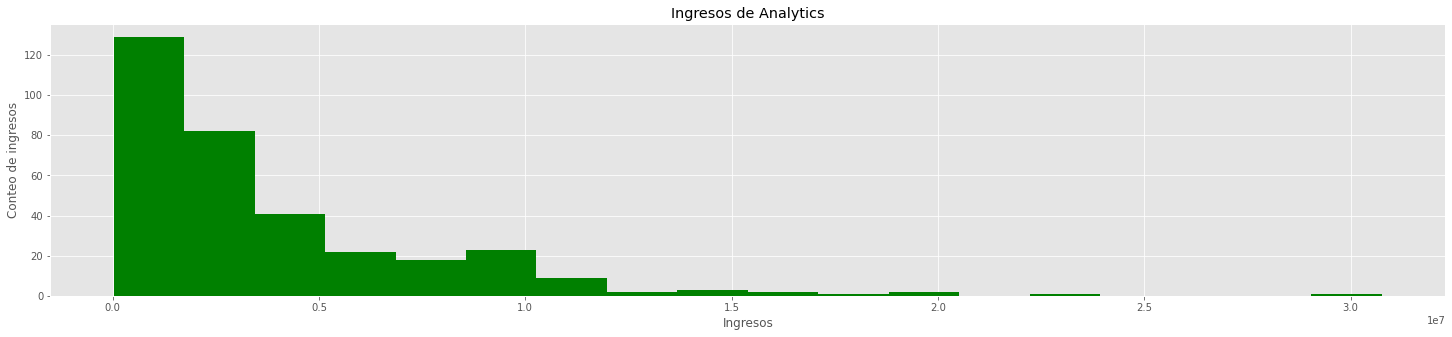

In [318]:
import numpy as np #Paquete para matrices
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [25, 5]
plt.style.use('ggplot')

#Es buena practica calcular los grupos adecuados para visualizar mejor el histograma.
n_data = len(analytics)
n_bins = int(np.sqrt(n_data))

_ = plt.hist(analytics['ingresos'], bins=n_bins, color = "green")
_ = plt.xlabel('Ingresos') 
_ = plt.ylabel('Conteo de ingresos')
_ = plt.title('Ingresos de Analytics')

plt.show()

##### Grafico de abejas para apreciar la dispersión de los datos por categoria afinidad.

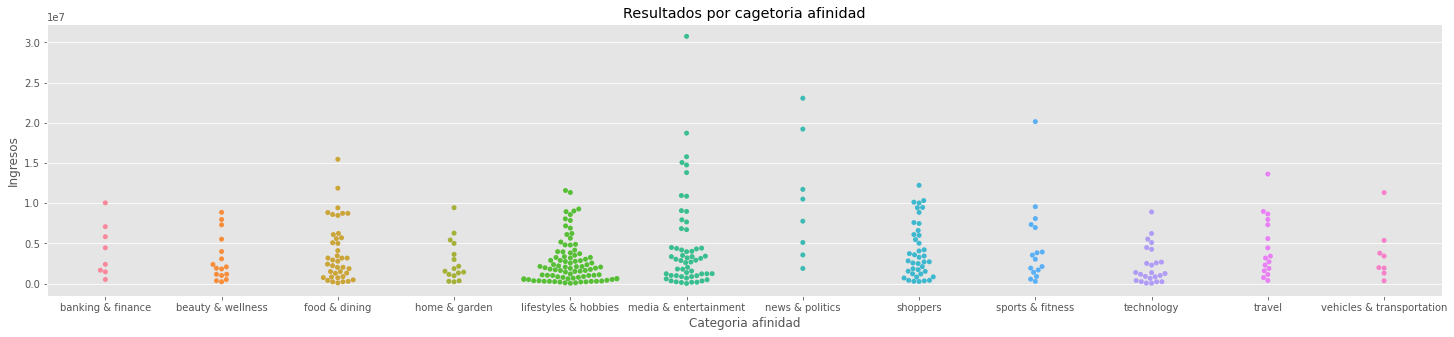

In [319]:
plt.rcParams['figure.figsize'] = [25, 5]

_ = sns.swarmplot(x='categoria_afinidad', y='ingresos', data=analytics) 
_ = plt.xlabel('Categoria afinidad')
_ = plt.ylabel('Ingresos')
_ = plt.title('Resultados por cagetoria afinidad')

plt.show()

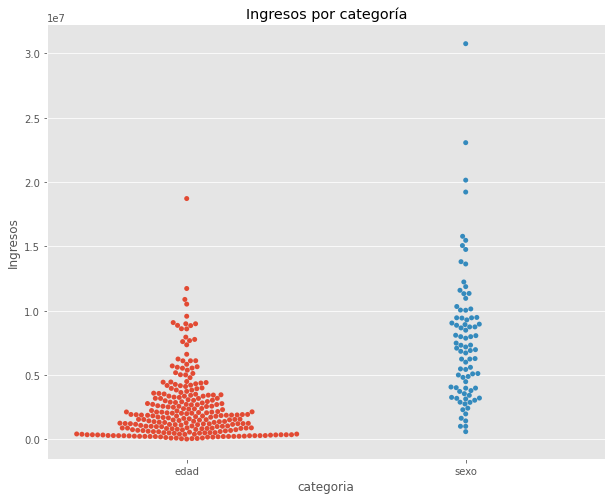

In [320]:
plt.rcParams['figure.figsize'] = [10, 8]

_ = sns.swarmplot(x='categoria', y='ingresos', data=analytics) 
_ = plt.ylabel('Ingresos')
_ = plt.title('Ingresos por categoría')

plt.show()

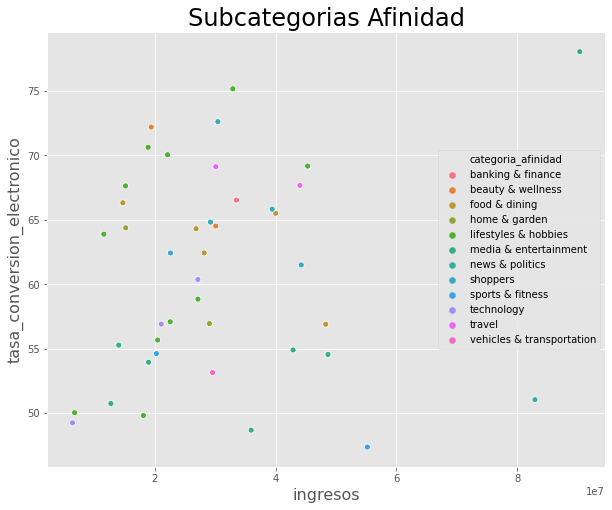

In [321]:
sns.scatterplot(x="ingresos",
                y="tasa_conversion_electronico",
                hue="categoria_afinidad",
                data=subcategoria_afinidad)

plt.xlabel("ingresos", size=16)
plt.ylabel("tasa_conversion_electronico", size=16)
plt.title("Subcategorias Afinidad", size=24)
plt.show()